In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='seaborn')

In [2]:
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import pandas as pd
from sklearn.datasets import fetch_openml

#from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes


print(__doc__)

diabetes_dataset_df = pd.read_csv("/Users/mennayoussef/Downloads/diabetes_data.csv", sep = ",")
diabetes_dataset_df

Automatically created module for IPython interactive environment


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data split into train and test

In [9]:
X= diabetes_dataset_df.drop(["Outcome"], axis=1)
y= diabetes_dataset_df["Outcome"]

In [11]:
X.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<Axes: xlabel='Outcome', ylabel='count'>

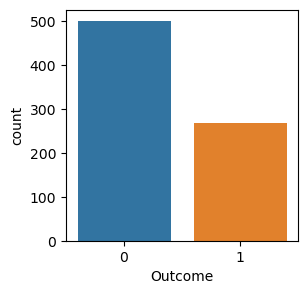

In [21]:
y.value_counts()

plt.figure(figsize=(3,3))
sns.countplot(x=y)


# Feature distribution visualization using whisker and box plots

<Axes: >

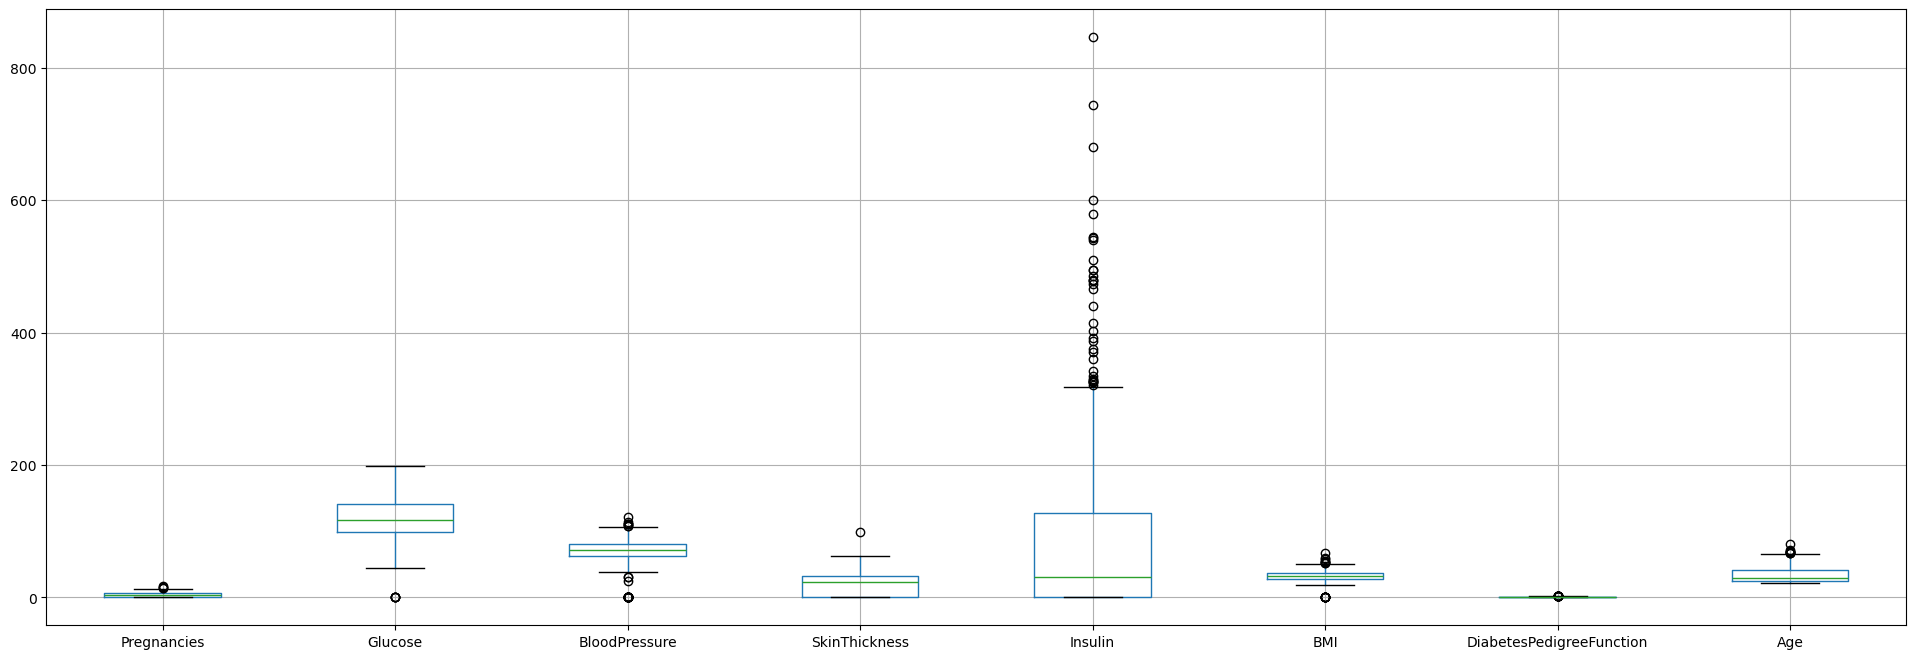

In [24]:
plt.figure(figsize=(24,8))
X.boxplot()

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

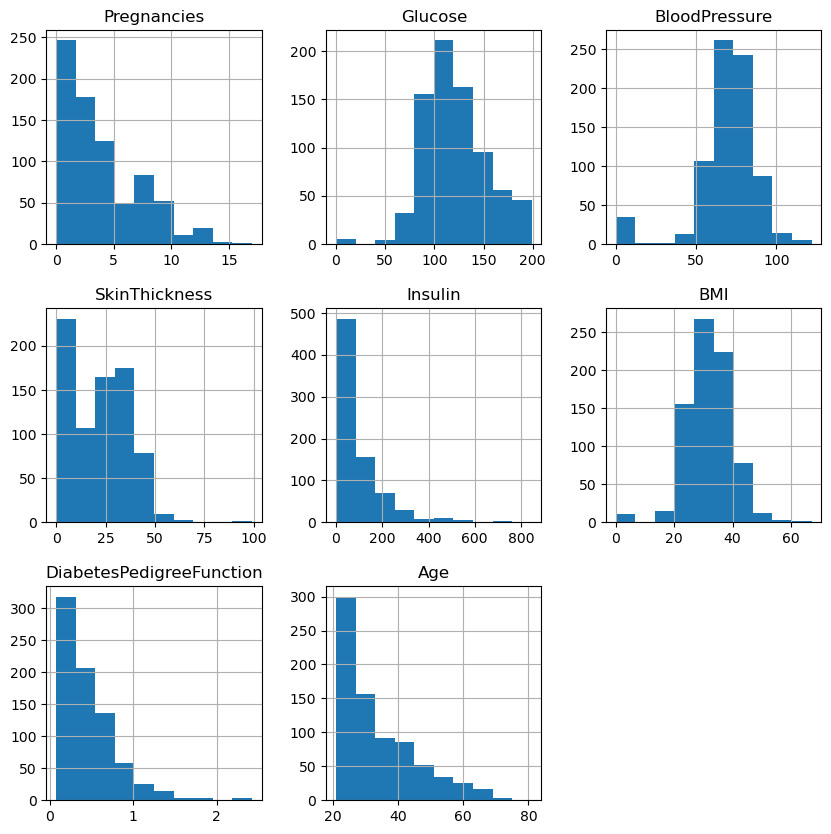

In [58]:
X.hist(figsize=(10,10))

# Comaprison between distribution differences in diabetic and non-diabetic classes

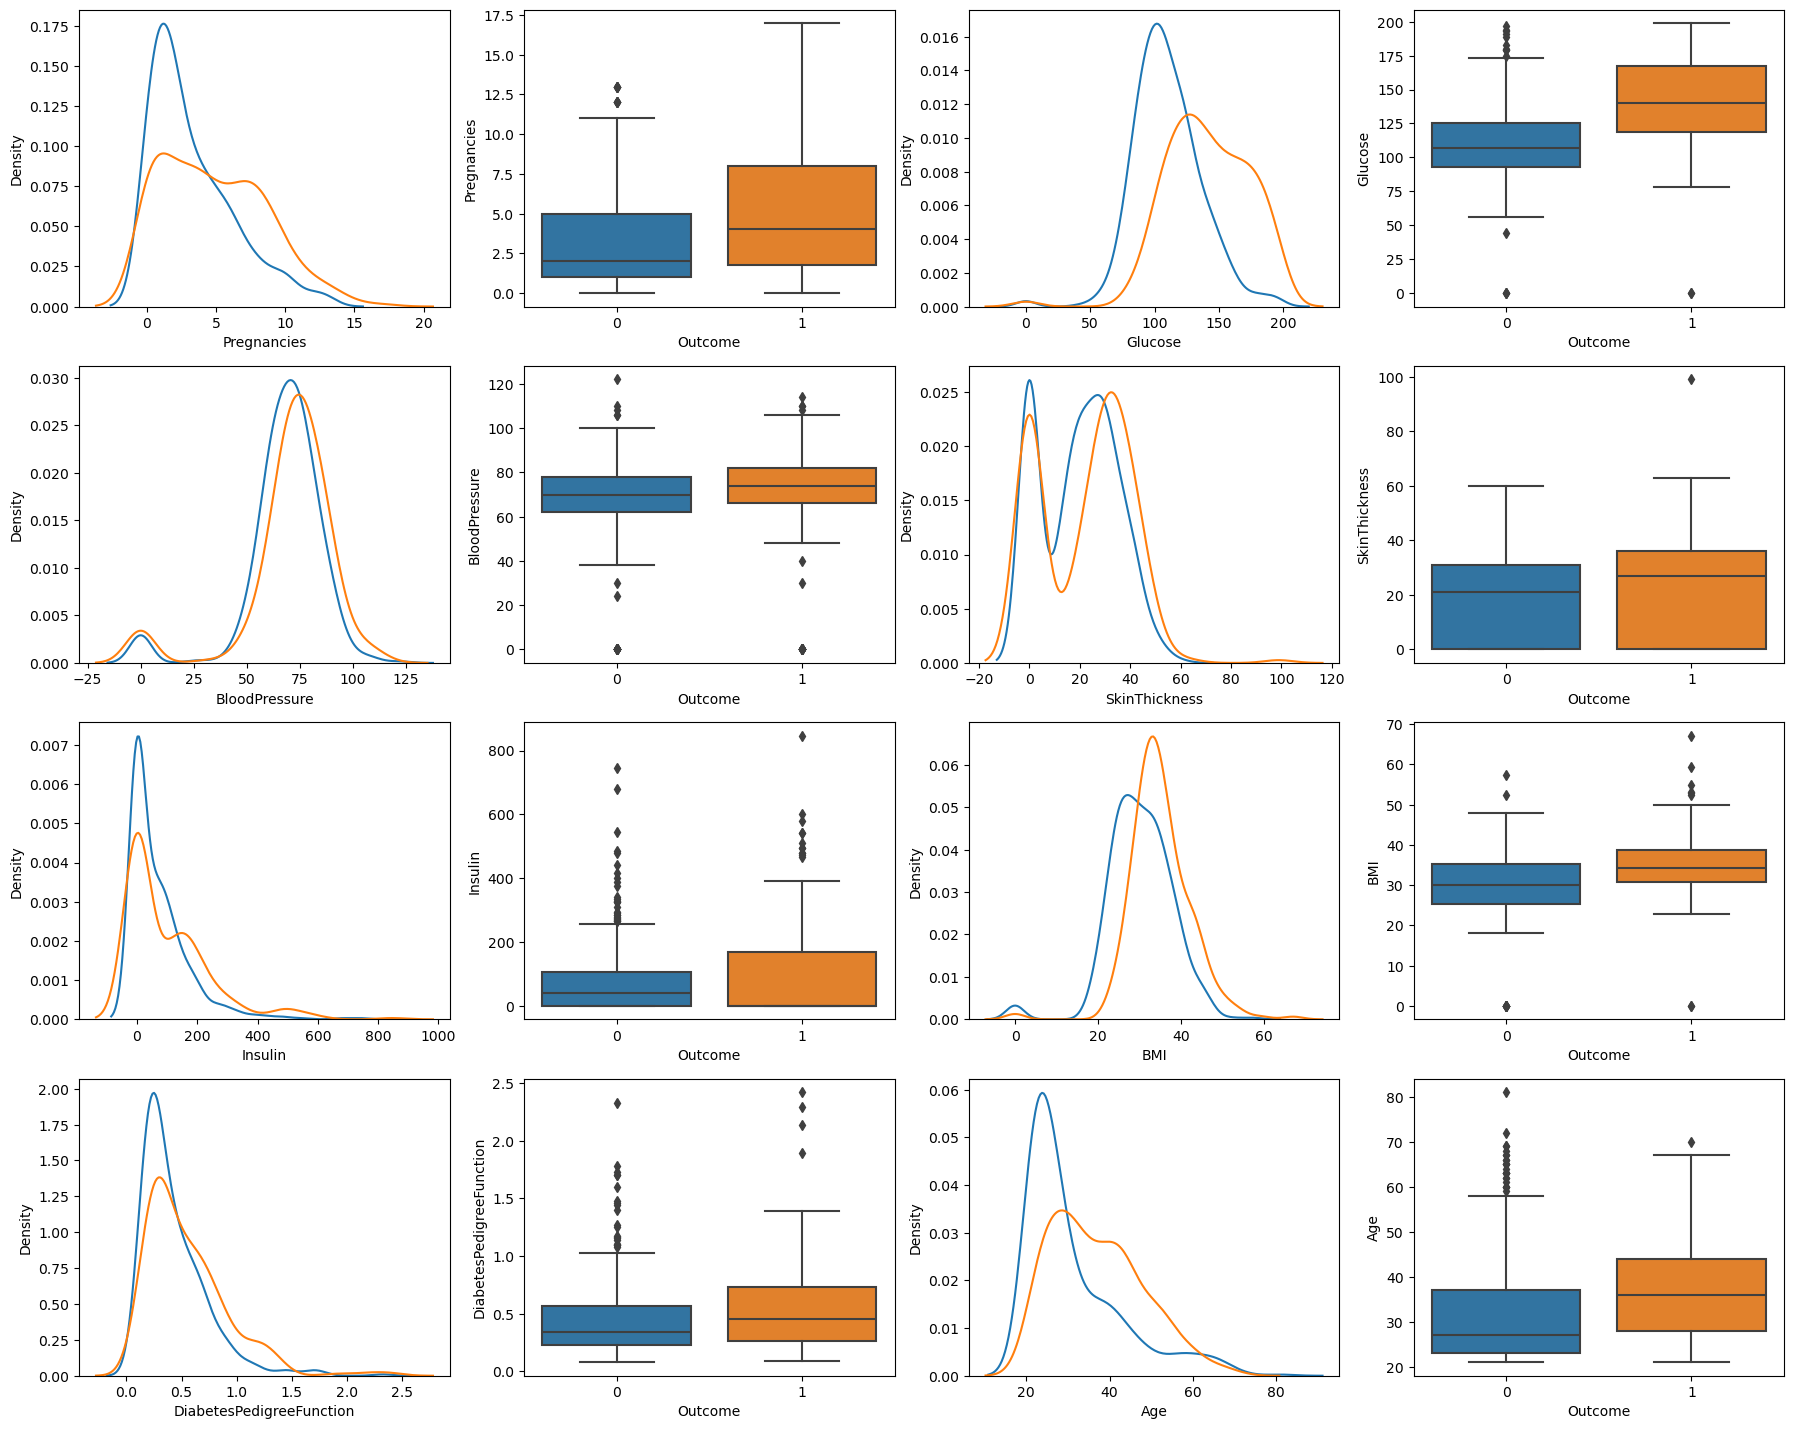

In [56]:
plt.figure(figsize=(22,27))
for i,col in enumerate(X.columns.tolist()):
    plt.subplot(6, 4, i*2+1)
    sns.kdeplot(diabetes_dataset_df.loc[diabetes_dataset_df["Outcome"]==0, col], label="healthy")
    sns.kdeplot(diabetes_dataset_df.loc[diabetes_dataset_df["Outcome"]==1, col], label="diabetic")
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y=col, x="Outcome", data=diabetes_dataset_df)

kde plots showed that blood pressure and skin thickness variables are not differentiable between the 2 outcomes. They can be excluded in feature selection stages.